# Подготовка

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [2]:

# Откройте исходный txt файл и прочитайте данные
with open("C:/Users/ahrus/Downloads/3rd test/3d_backtest.json", 'r') as f:
    data = f.read().splitlines()

# Преобразуйте каждую строку в JSON объект и соберите все в список
json_objects = [json.loads(line) for line in data if line.strip()]

# Запишите новый JSON массив в файл
with open("C:/Users/ahrus/Downloads/3rd test/backtests_array.json", 'w') as f:
    json.dump(json_objects, f)


In [2]:
import json
import pandas as pd
import openpyxl
from pandas import json_normalize  # для версий pandas >= 1.0.0

with open("C:/Users/ahrus/Downloads/3rd test/backtests_array.json") as f:
    data = json.load(f)

# "Разворачиваем" вложенные структуры
df = pd.json_normalize(data)

# Теперь у вас есть DataFrame с "разложенными" структурами
# Вы можете выбрать столбцы, которые хотите включить в окончательный DataFrame



In [3]:
# df = pd.json_normalize(data)


In [4]:
columns = ['_id', 'title', 'result.summary.Backtest start', 'result.summary.Backtest end', 'init_balance', 'config.stake', 'result.summary.Total profit',
       'timeframe', 'fee_rate','config.ticker1',
       'config.ticker2', 'config.train_period', 'config.retrain_period',
       'config.leverage',  'result.summary.Drawdown.dd_start',
       'result.summary.Drawdown.dd_end', 'result.summary.Drawdown.max_dd_abs',
       'result.summary.Drawdown.max_dd_rel', 
       
       'result.summary.Trades_analysis.ticker1.long_amount',
       'result.summary.Trades_analysis.ticker1.short_amount',
       'result.summary.Trades_analysis.ticker1.total_profit_long',
       'result.summary.Trades_analysis.ticker1.total_profit_short',
       'result.summary.Trades_analysis.ticker1.total_profit',
      
       'result.summary.Trades_analysis.ticker2.long_amount',
       'result.summary.Trades_analysis.ticker2.short_amount',
       'result.summary.Trades_analysis.ticker2.total_profit_long',
       'result.summary.Trades_analysis.ticker2.total_profit_short',
       'result.summary.Trades_analysis.ticker2.total_profit',
           
       'result.summary.Trades_analysis.trades_amount',
       'result.summary.Trades_analysis.total_profit_long',
       'result.summary.Trades_analysis.total_profit_short',
       'result.summary.Trades_analysis.best_trade',
       'result.summary.Trades_analysis.worst_trade',
       'result.summary.Trades_analysis.avg_dur_winners',
       'result.summary.Trades_analysis.avg_dur_loosers',
       'result.summary.Metrics.sortino', 'result.summary.Metrics.sharp',
       'result.summary.Metrics.calmar', 'result.summary.Metrics.cagr',
       'result.summary.Metrics.profit_factor', 'result.summary.Metrics.omega',
       'result.summary.Metrics.GHPR', 'result.summary.Metrics.AHPR',
       'result.summary.Metrics.winloose']

In [5]:
df = df[columns]

In [6]:
rename = {'_id':"id", 
           'title':"title", 
           'result.summary.Backtest start':"from",
           'result.summary.Backtest end':"to",
           'init_balance':"start balance",
           'config.stake': "stake",
           'result.summary.Total profit':"profit",
           'timeframe': "timeframe",
           'fee_rate':"fee",
           'config.ticker1':"ticker1",
           'config.ticker2':"ticker2",
           'config.train_period':"train",
           'config.retrain_period':"retrain",
            'config.leverage':"leverage",
           'result.summary.Drawdown.dd_start':"dd from",
           'result.summary.Drawdown.dd_end':"dd to",
           'result.summary.Drawdown.max_dd_abs':"max dd",
           'result.summary.Drawdown.max_dd_rel':"max dd %", 
       'result.summary.Trades_analysis.ticker1.long_amount':"t1 long",
       'result.summary.Trades_analysis.ticker1.short_amount':"t1 short",
       'result.summary.Trades_analysis.ticker1.total_profit_long':"t1 long profit",
       'result.summary.Trades_analysis.ticker1.total_profit_short': "t1 short profit",
       'result.summary.Trades_analysis.ticker1.total_profit':"t1 total profit",
      
       'result.summary.Trades_analysis.ticker2.long_amount':"t2 long",
       'result.summary.Trades_analysis.ticker2.short_amount':"t2 short",
       'result.summary.Trades_analysis.ticker2.total_profit_long':"t2 long profit",
       'result.summary.Trades_analysis.ticker2.total_profit_short':"t2 short profit",
       'result.summary.Trades_analysis.ticker2.total_profit':"t2 total profit",
           
       'result.summary.Trades_analysis.trades_amount':'trades amount',
       'result.summary.Trades_analysis.total_profit_long':'long profit',
       'result.summary.Trades_analysis.total_profit_short':'short profit',
       'result.summary.Trades_analysis.best_trade':'best trade',
       'result.summary.Trades_analysis.worst_trade':'worst trade',
       'result.summary.Trades_analysis.avg_dur_winners':'avg_dur_winners',
       'result.summary.Trades_analysis.avg_dur_loosers':'avg_dur_loosers',
       'result.summary.Metrics.sortino':'sortino',
        'result.summary.Metrics.sharp':'sharp',
       'result.summary.Metrics.calmar':'calmar', 
        'result.summary.Metrics.cagr':'cagr',
       'result.summary.Metrics.profit_factor':'profit_factor',
        'result.summary.Metrics.omega':'omega',
       'result.summary.Metrics.GHPR':'ghpr',
        'result.summary.Metrics.AHPR':'ahpr',
       'result.summary.Metrics.winloose':'WL'}

In [7]:
df = df.rename(columns=rename)

In [8]:
name_filter = '3d' 
df_filtered = df[df['title'].str.contains(name_filter)]

In [9]:
# grouped_tickers = df_filtered.groupby(['ticker1', 'ticker2'])
# df_tickers = grouped_tickers.filter(lambda x: len(x) > 1)

grouped_periods = df_filtered.groupby(['train', 'retrain'])
df_periods = grouped_periods.filter(lambda x: len(x) > 1)

In [10]:
# grouped_tickers = df_tickers.groupby(['ticker1', 'ticker2'])
grouped_periods = df_periods.groupby(['train', 'retrain'])
# max_values = df_tickers.groupby(['ticker1', 'ticker2']).apply(lambda x: x.nlargest(1, ['WL','profit']))
# max_values = df_tickers.groupby(['ticker1', 'ticker2']).apply(lambda x: x.nlargest(1, ['omega', 'ghpr', 'cagr', 'calmar', 'sharp', 'sortino', 'WL', 'profit_factor', 'profit', 'trades amount']))

In [11]:
# max_params = max_values.copy()
# max_params['profit'] = max_values.apply(lambda x: f"{x['train']}/{x['retrain']}" if pd.notnull(x['profit']) else None, axis=1)
# max_params['profit_factor'] = max_values.apply(lambda x: f"{x['train']}/{x['retrain']}" if pd.notnull(x['profit_factor']) else None, axis=1)
# max_params['WL'] = max_values.apply(lambda x: f"{x['train']}/{x['retrain']}" if pd.notnull(x['WL']) else None, axis=1)
# max_params['sortino'] = max_values.apply(lambda x: f"{x['train']}/{x['retrain']}" if pd.notnull(x['sortino']) else None, axis=1)
# max_params['sharp'] = max_values.apply(lambda x: f"{x['train']}/{x['retrain']}" if pd.notnull(x['sharp']) else None, axis=1)
# max_params['calmar'] = max_values.apply(lambda x: f"{x['train']}/{x['retrain']}" if pd.notnull(x['calmar']) else None, axis=1)
# max_params['cagr'] = max_values.apply(lambda x: f"{x['train']}/{x['retrain']}" if pd.notnull(x['cagr']) else None, axis=1)
# max_params['ghpr'] = max_values.apply(lambda x: f"{x['train']}/{x['retrain']}" if pd.notnull(x['ghpr']) else None, axis=1)
# max_params['trades amount'] = max_values.apply(lambda x: f"{x['train']}/{x['retrain']}" if pd.notnull(x['trades amount']) else None, axis=1)
# max_params['omega'] = max_values.apply(lambda x: f"{x['train']}/{x['retrain']}" if pd.notnull(x['omega']) else None, axis=1)

In [12]:
# with pd.ExcelWriter('C:/Users/ahrus/Downloads/3rd test/3d_test_1_____.xlsx') as writer:  
#     for group, data in grouped_periods:
#         sheet_name = f'{group[0]}_{group[1]}'
#         data.to_excel(writer, sheet_name=sheet_name)

In [13]:
# with pd.ExcelWriter('C:/Users/ahrus/Downloads/3rd test/3d_test.xlsx') as writer:  
    
#     # Цикл по группам
# #     for group, data in grouped_tickers:
       
# #         sheet_name = f'{group[0][:-4]}_{group[1][:-4]}'
# #         data.to_excel(writer, sheet_name=sheet_name)


#     # Цикл по группам
#     for group, data in grouped_periods:
#         sheet_name = f'{group[0]}_{group[1]}'
#         data.to_excel(writer, sheet_name=sheet_name)
        
# #     max_values[['profit_factor', 'WL', 'profit', 'sortino', 'sharp', 'calmar', 'cagr', 'ghpr', 'trades amount','omega']].reset_index().to_excel(writer, sheet_name='best PF and WL')
# #     max_params[['profit_factor', 'WL', 'profit', 'sortino', 'sharp', 'calmar', 'cagr', 'ghpr', 'trades amount','omega']].reset_index().to_excel(writer, sheet_name='params for max values')

In [14]:
# df = df[['title','ticker1','ticker2', 'profit']]

In [15]:
df.head(1)

,id,title,from,to,start balance,stake,profit,timeframe,fee,ticker1,...,avg_dur_loosers,sortino,sharp,calmar,cagr,profit_factor,omega,ghpr,ahpr,WL
0,2d5be67a,3d_test backtest futures ALGO/AXS\n 2/1,2022-04-01 09:00:00,2023-02-01 09:00:00,1000,100,132.68689,5m,0.1,ALGOUSDT,...,5.47,0.311166,0.210539,0.430011,1.139099,1.653857,1.753012,0.019716,"[1.260585245423059, 13.268688956414872]",4.355932


In [89]:
import pandas as pd
# df = df[['title','ticker1','ticker2', 'profit']]
# Разделение на два DataFrame: backtest и forward
backtest_df = df[df['title'].str.contains('backtest')]
forward_df = df[df['title'].str.contains('forward')]

# Сортировка по профиту и добавление столбца с порядковым номером
backtest_df = backtest_df.sort_values('profit', ascending=False).reset_index(drop=True)
backtest_df['index_backtest'] = backtest_df.index + 1

forward_df = forward_df.sort_values('profit', ascending=False).reset_index(drop=True)
forward_df['index_forward'] = forward_df.index + 1

# # Переименование столбцов в каждом DataFrame
# backtest_df.rename(columns={'profit': 'profit_backtest'}, inplace=True)
# forward_df.rename(columns={'profit': 'profit_forward'}, inplace=True)

merged_df = pd.merge(backtest_df, forward_df, on=['ticker1', 'ticker2'], how='inner')

# Запись в Excel
# with pd.ExcelWriter('C:/Users/ahrus/Downloads/3rd test/wide_join.xlsx') as writer:
#     merged_df.to_excel(writer, sheet_name='merged', index=False)
#     backtest_df.to_excel(writer, sheet_name='backtest', index=False)
#     forward_df.to_excel(writer, sheet_name='forward', index=False)

In [90]:
# df

In [91]:
# import json
# import pandas as pd
# from pandas import json_normalize 

# with open("C:/Users/ahrus/Downloads/backtests2.json") as f:
#     data = json.load(f)

# df = pd.json_normalize(data)

# df = df.rename(columns=rename)
# name_filter = '2nd' 
# df_filtered = df[df['title'].str.contains(name_filter)]
# grouped_tickers = df_filtered.groupby(['ticker1', 'ticker2'])
# df_tickers = grouped_tickers.filter(lambda x: len(x) > 1)

# df_periods = grouped_periods.filter(lambda x: len(x) > 1)
# grouped_tickers = df_tickers.groupby(['ticker1', 'ticker2'])
# grouped_periods = df_periods.groupby(['train', 'retrain'])

# max_values = df_tickers.groupby(['ticker1', 'ticker2']).apply(lambda x: x.nlargest(1, ['profit_factor', 'WL', 'sortino', 'sharp', 'calmar', 'cagr', 'ghpr']))

# with pd.ExcelWriter('C:/Users/ahrus/Downloads/2nd_test_output1.xlsx') as writer:  
    
#     for group, data in grouped_tickers:
# #         sheet_name = f'{group[0][:-4]}_{group[1][:-4]}'
# #         data.to_excel(writer, sheet_name=sheet_name)

#     for group, data in grouped_periods:
# #         sheet_name = f'{group[0]}_{group[1]}'
# #         data.to_excel(writer, sheet_name=sheet_name)

#     # Добавляем новый лист с максимальными значениями
# #     max_values[['profit_factor', 'WL', 'sortino', 'sharp', 'calmar', 'cagr', 'ghpr']].reset_index().to_excel(writer, sheet_name='best PF and WL')

#     # Добавляем новый лист с параметрами для максимальных значений
#     max_params[['profit_factor', 'WL', 'sortino', 'sharp', 'calmar', 'cagr', 'ghpr']].reset_index().to_excel(writer, sheet_name='params for max values')

In [92]:
df

,id,title,from,to,start balance,stake,profit,timeframe,fee,ticker1,...,avg_dur_loosers,sortino,sharp,calmar,cagr,profit_factor,omega,ghpr,ahpr,WL
0,2d5be67a,3d_test backtest futures ALGO/AXS\n 2/1,2022-04-01 09:00:00,2023-02-01 09:00:00,1000,100,132.686890,5m,0.1,ALGOUSDT,...,5.47,0.311166,0.210539,0.430011,1.139099,1.653857,1.753012,0.019716,"[1.260585245423059, 13.268688956414872]",4.355932
1,2d6182a6,3d_test backtest futures DENT/REN\n 2/1,2022-04-01 09:00:00,2023-02-01 09:00:00,1000,100,309.873844,5m,0.1,DENTUSDT,...,4.28,NaN,1.720919,1.319516,2.484273,2.716923,NaN,0.035617,"[2.740540981761679, 30.987384417054635]",6.580000
2,2d61ee76,3d_test backtest futures ZEN/FLM\n 2/1,2022-04-01 09:00:00,2023-02-01 09:00:00,1000,100,205.936165,5m,0.1,ZENUSDT,...,4.75,1.142757,0.389010,1.056406,1.716901,2.360133,2.965065,0.030207,"[1.9143440122410602, 20.59361646495004]",5.739130
3,2d624394,3d_test backtest futures SXP/FXS\n 2/1,2022-04-01 09:00:00,2023-02-01 09:00:00,1000,100,132.295369,5m,0.1,SXPUSDT,...,5.62,0.337968,0.205336,0.661404,1.135920,1.580495,1.634258,0.020370,"[1.2572176555039696, 13.229536934297972]",3.178082
4,2d62823c,3d_test backtest futures NKN/DODO\n 2/1,2022-04-01 09:00:00,2023-02-01 09:00:00,1000,100,439.364819,5m,0.1,NKNUSDT,...,4.02,NaN,0.794032,1.614373,3.366348,3.223010,NaN,0.045880,"[3.7601374072272735, 43.936481864448545]",5.844828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6651,7d880120,3d_test forward mixed BNT/ONT 2/1,2023-02-01 09:00:00,2023-06-18 09:00:00,1000,100,64.904419,5m,0.1,BNTUSDT,...,4.67,0.576089,0.278969,1.895280,1.265643,2.001312,2.099970,0.019840,"[1.2693273073316869, 12.980883803897086]",3.594203
6652,7d882fc4,3d_test forward mixed DCR/FLM 2/1,2023-02-01 09:00:00,2023-06-18 09:00:00,1000,100,128.374639,5m,0.1,DCRUSDT,...,4.04,1.769820,0.735565,1.473854,2.444976,2.691437,4.957438,0.036168,"[2.4605479634845473, 25.674927749349354]",4.758621
6653,7d88643a,3d_test forward mixed FUN/IOST 2/1,2023-02-01 09:00:00,2023-06-18 09:00:00,1000,100,44.781058,5m,0.1,FUNUSDT,...,4.11,-0.142571,-0.074069,0.383919,0.879996,1.542412,0.815452,0.011905,"[0.8888331441623798, 8.956211508854313]",3.380952
6654,7d88a0b2,3d_test forward mixed TRX/XVG 2/1,2023-02-01 09:00:00,2023-06-18 09:00:00,1000,100,61.954776,5m,0.1,TRXUSDT,...,4.60,0.376909,0.223187,1.592111,1.209483,1.913490,1.820027,0.018107,"[1.2130976531508253, 12.390955207567776]",4.533333


In [93]:
df1 = pd.read_csv('C:/Users/ahrus/Downloads/3rd test/in.csv', sep=';')

In [94]:
df1

,title_x,ticker1,ticker2,profit_backtest,index_backtest,profit_forward,index_forward,change
0,3d_test backtest no_futures ADADOWN/NMR 2/1,ADADOWNUSDT,NMRUSDT,"609,3464788",11,"172,232491",19,8
1,3d_test backtest futures XEM/FET\n 2/1,XEMUSDT,FETUSDT,"568,7145818",19,"160,212475",41,22
2,3d_test backtest mixed VTHO/UMA\n 2/1,VTHOUSDT,UMAUSDT,"544,7012906",27,"164,3637011",32,5
3,3d_test backtest no_futures COS/CVP 2/1,COSUSDT,CVPUSDT,"544,146852",28,"286,2134691",1,27
4,3d_test backtest no_futures DATA/COS 2/1,DATAUSDT,COSUSDT,"525,6178244",37,"142,7697337",93,56
...,...,...,...,...,...,...,...,...
254,3d_test backtest futures EOS/TRX\n 2/1,EOSUSDT,TRXUSDT,"132,8840733",3004,"11,71957045",2924,80
255,3d_test backtest futures LINK/IOST\n 2/1,LINKUSDT,IOSTUSDT,"131,5520931",3014,"7,913805665",2982,32
256,3d_test backtest futures HOT/FXS\n 2/1,HOTUSDT,FXSUSDT,"131,3026111",3016,"6,356311424",2999,17
257,3d_test backtest no_futures GBP/BNBUP 2/1,GBPUSDT,BNBUPUSDT,"130,5132293",3021,"-5,06278206",3077,56


In [95]:
df1_1 = pd.read_csv('C:/Users/ahrus/Downloads/3rd test/in1.csv', sep=';')

In [96]:
df1_1

,title_x,ticker1,ticker2,profit_backtest,index_backtest,profit_forward,index_forward,change
0,3d_test backtest no_futures BNT/WTC 2/1,BNTUSDT,WTCUSDT,"1282,92589",1,"66,81807318",1285,1284
1,3d_test backtest no_futures BNT/ETHUP 2/1,BNTUSDT,ETHUPUSDT,"1256,156763",2,"52,31929438",1807,1805
2,3d_test backtest mixed BNT/MANA\n 2/1,BNTUSDT,MANAUSDT,"1091,026288",3,NaN,3284,3281
3,3d_test backtest mixed XRP/XRPUP\n 2/1,XRPUSDT,XRPUPUSDT,"879,1259045",4,NaN,3322,3318
4,3d_test backtest mixed COCOS/CVP\n 2/1,COCOSUSDT,CVPUSDT,"763,359018",5,NaN,3326,3321
...,...,...,...,...,...,...,...,...
3323,3d_test backtest no_futures JST/HARD 2/1,JSTUSDT,HARDUSDT,NaN,3325,"10,26486322",2943,382
3324,3d_test backtest no_futures BNT/LSK 2/1,BNTUSDT,LSKUSDT,NaN,3232,"8,851492771",2970,262
3325,3d_test backtest no_futures FUN/ADX 2/1,FUNUSDT,ADXUSDT,NaN,3314,"4,741865863",3014,300
3326,3d_test backtest no_futures COS/TROY 2/1,COSUSDT,TROYUSDT,NaN,3238,"1,190465047",3044,194


In [97]:
df2 = pd.read_csv('C:/Users/ahrus/Downloads/3rd test/in_tests.csv', sep=';')

In [98]:
df2

,Assets,Engle-Granger test,KSS linear,KSS non linear,T_value
0,ALGO/AXS,True,False,True,"-3,5"
1,DENT/REN,False,False,True,"-3,5"
2,ZEN/FLM,False,False,True,"-3,5"
3,SXP/FXS,True,False,True,"-3,5"
4,NKN/DODO,False,False,True,"-3,5"
...,...,...,...,...,...
3495,BNT/ONT,True,False,True,"-9,96"
3496,DCR/FLM,True,False,True,"-9,98"
3497,FUN/IOST,False,False,True,"-9,99"
3498,TRX/XVG,True,True,True,"-9,99"


In [99]:
import pandas as pd

# Разделение столбца "Assets" на "ticker1" и "ticker2"
df2[['ticker1', 'ticker2']] = df2['Assets'].str.split('/', expand=True)

# Удаление столбца "Assets", если не требуется
df2 = df2.drop('Assets', axis=1)

df2.head()

,Engle-Granger test,KSS linear,KSS non linear,T_value,ticker1,ticker2
0,True,False,True,"-3,5",ALGO,AXS
1,False,False,True,"-3,5",DENT,REN
2,False,False,True,"-3,5",ZEN,FLM
3,True,False,True,"-3,5",SXP,FXS
4,False,False,True,"-3,5",NKN,DODO


In [100]:
df2['ticker1'] = df2['ticker1'] + 'USDT'
df2['ticker2'] = df2['ticker2'] + 'USDT'

df2.head()

,Engle-Granger test,KSS linear,KSS non linear,T_value,ticker1,ticker2
0,True,False,True,"-3,5",ALGOUSDT,AXSUSDT
1,False,False,True,"-3,5",DENTUSDT,RENUSDT
2,False,False,True,"-3,5",ZENUSDT,FLMUSDT
3,True,False,True,"-3,5",SXPUSDT,FXSUSDT
4,False,False,True,"-3,5",NKNUSDT,DODOUSDT


In [101]:
merged_df = df1_1.merge(backtest_df, on=['ticker1', 'ticker2'], how='inner')
merged_df = merged_df.merge(forward_df, on=['ticker1', 'ticker2'], how='inner')
merged_df = merged_df.merge(df2, on=['ticker1', 'ticker2'], how='inner')
# with pd.ExcelWriter('C:/Users/ahrus/Downloads/3rd test/double_join_all_out.xlsx') as writer:
#     merged_df.to_excel(writer, sheet_name='merged', index=False)

C:\Users\ahrus\AppData\Local\Temp\ipykernel_52960\807360250.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'title_x'} in the result is deprecated and will raise a MergeError in a future version.
  merged_df = merged_df.merge(forward_df, on=['ticker1', 'ticker2'], how='inner')


In [102]:
merged_df

,title_x,ticker1,ticker2,profit_backtest,index_backtest_x,profit_forward,index_forward_x,change,id_x,title_x,...,profit_factor_y,omega_y,ghpr_y,ahpr_y,WL_y,index_forward_y,Engle-Granger test,KSS linear,KSS non linear,T_value
0,3d_test backtest no_futures BNT/WTC 2/1,BNTUSDT,WTCUSDT,"1282,92589",1,"66,81807318",1285,1284,d87efa9c,3d_test backtest no_futures BNT/WTC 2/1,...,1.723370,10.396036,0.017869,"[1.3028352901744489, 13.363614636876946]",3.113636,1285,True,False,True,"-6,8"
1,3d_test backtest no_futures BNT/ETHUP 2/1,BNTUSDT,ETHUPUSDT,"1256,156763",2,"52,31929438",1807,1805,d84717ee,3d_test backtest no_futures BNT/ETHUP 2/1,...,1.506669,1.062079,0.014698,"[1.0318416241945383, 10.463858876551194]",3.506494,1807,False,False,True,"-4,05"
2,3d_test backtest mixed BNT/MANA\n 2/1,BNTUSDT,MANAUSDT,"1091,026288",3,NaN,3284,3281,7ca37a36,3d_test backtest mixed BNT/MANA\n 2/1,...,NaN,NaN,NaN,NaN,NaN,3284,False,False,True,"-3,51"
3,3d_test backtest mixed XRP/XRPUP\n 2/1,XRPUSDT,XRPUPUSDT,"879,1259045",4,NaN,3322,3318,7d12326e,3d_test backtest mixed XRP/XRPUP\n 2/1,...,NaN,NaN,NaN,NaN,NaN,3322,False,False,True,"-4,99"
4,3d_test backtest mixed COCOS/CVP\n 2/1,COCOSUSDT,CVPUSDT,"763,359018",5,NaN,3326,3321,7d5b7118,3d_test backtest mixed COCOS/CVP\n 2/1,...,NaN,NaN,NaN,NaN,NaN,3326,True,False,True,"-6,16"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,3d_test backtest no_futures JST/HARD 2/1,JSTUSDT,HARDUSDT,NaN,3325,"10,26486322",2943,382,d9151d10,3d_test backtest no_futures JST/HARD 2/1,...,1.113610,0.222591,0.003660,"[0.21513800829569218, 2.052972643184239]",3.292308,2943,True,False,True,"-10,98"
3324,3d_test backtest no_futures BNT/LSK 2/1,BNTUSDT,LSKUSDT,NaN,3232,"8,851492771",2970,262,d8b6ddf4,3d_test backtest no_futures BNT/LSK 2/1,...,1.081749,0.000000,0.002441,"[0.17851424992515463, 1.7702985541468934]",2.646465,2970,True,False,True,"-9,71"
3325,3d_test backtest no_futures FUN/ADX 2/1,FUNUSDT,ADXUSDT,NaN,3314,"4,741865863",3014,300,d905ffb0,3d_test backtest no_futures FUN/ADX 2/1,...,1.046988,0.084324,0.001336,"[0.09741593348023603, 0.948373172628726]",2.339623,3014,True,False,True,"-10,57"
3326,3d_test backtest no_futures COS/TROY 2/1,COSUSDT,TROYUSDT,NaN,3238,"1,190465047",3044,194,d8ba301c,3d_test backtest no_futures COS/TROY 2/1,...,1.008231,0.333723,0.000338,"[0.05824890957576425, 0.23809300947023077]",4.677419,3044,True,False,True,"-9,78"


In [103]:
merged_df = merged_df.applymap(lambda x: str(x).replace(',', '.'))
merged_df = merged_df.applymap(lambda x: str(x).replace('nan', '0'))


In [104]:
merged_df

,title_x,ticker1,ticker2,profit_backtest,index_backtest_x,profit_forward,index_forward_x,change,id_x,title_x,...,profit_factor_y,omega_y,ghpr_y,ahpr_y,WL_y,index_forward_y,Engle-Granger test,KSS linear,KSS non linear,T_value
0,3d_test backtest no_futures BNT/WTC 2/1,BNTUSDT,WTCUSDT,1282.92589,1,66.81807318,1285,1284,d87efa9c,3d_test backtest no_futures BNT/WTC 2/1,...,1.723369585441095,10.396035912194968,0.0178691252537444,[1.3028352901744489. 13.363614636876946],3.1136363636363638,1285,True,False,True,-6.8
1,3d_test backtest no_futures BNT/ETHUP 2/1,BNTUSDT,ETHUPUSDT,1256.156763,2,52.31929438,1807,1805,d84717ee,3d_test backtest no_futures BNT/ETHUP 2/1,...,1.50666912179429,1.0620793540495614,0.014697500736415847,[1.0318416241945383. 10.463858876551194],3.5064935064935066,1807,False,False,True,-4.05
2,3d_test backtest mixed BNT/MANA\n 2/1,BNTUSDT,MANAUSDT,1091.026288,3,0,3284,3281,7ca37a36,3d_test backtest mixed BNT/MANA\n 2/1,...,0,0,0,0,0,3284,False,False,True,-3.51
3,3d_test backtest mixed XRP/XRPUP\n 2/1,XRPUSDT,XRPUPUSDT,879.1259045,4,0,3322,3318,7d12326e,3d_test backtest mixed XRP/XRPUP\n 2/1,...,0,0,0,0,0,3322,False,False,True,-4.99
4,3d_test backtest mixed COCOS/CVP\n 2/1,COCOSUSDT,CVPUSDT,763.359018,5,0,3326,3321,7d5b7118,3d_test backtest mixed COCOS/CVP\n 2/1,...,0,0,0,0,0,3326,True,False,True,-6.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,3d_test backtest no_futures JST/HARD 2/1,JSTUSDT,HARDUSDT,0,3325,10.26486322,2943,382,d9151d10,3d_test backtest no_futures JST/HARD 2/1,...,1.1136103529157078,0.22259079294937698,0.003660474621658416,[0.21513800829569218. 2.052972643184239],3.292307692307692,2943,True,False,True,-10.98
3324,3d_test backtest no_futures BNT/LSK 2/1,BNTUSDT,LSKUSDT,0,3232,8.851492771,2970,262,d8b6ddf4,3d_test backtest no_futures BNT/LSK 2/1,...,1.0817489478309965,0.0,0.002441178813761269,[0.17851424992515463. 1.7702985541468934],2.6464646464646466,2970,True,False,True,-9.71
3325,3d_test backtest no_futures FUN/ADX 2/1,FUNUSDT,ADXUSDT,0,3314,4.741865863,3014,300,d905ffb0,3d_test backtest no_futures FUN/ADX 2/1,...,1.046988157426523,0.08432352493440136,0.0013363531754517766,[0.09741593348023603. 0.948373172628726],2.339622641509434,3014,True,False,True,-10.57
3326,3d_test backtest no_futures COS/TROY 2/1,COSUSDT,TROYUSDT,0,3238,1.190465047,3044,194,d8ba301c,3d_test backtest no_futures COS/TROY 2/1,...,1.0082312557907118,0.3337230744317967,0.00033799972056769434,[0.05824890957576425. 0.23809300947023077],4.67741935483871,3044,True,False,True,-9.78


In [105]:
t_test = pd.read_csv('C:/Users/ahrus/Downloads/CointegrationCheckNew2.csv', sep=';')

In [106]:
t_test

,ticker1,ticker2,t_vl
0,BTC,ETH,-14.244935
1,BTC,NEO,-14.306532
2,BTC,BNB,-13.811845
3,BTC,QTUM,-15.088897
4,BTC,EOS,-13.860154
...,...,...,...
16391,ADADOWN,OM,-15.220638
16392,ADADOWN,POND,-12.363582
16393,ADADOWN,ALICE,-11.722358
16394,ADADOWN,DEGO,-17.260474


In [107]:
t_test['ticker1'] += 'USDT'
t_test['ticker2'] += 'USDT'
t_test

,ticker1,ticker2,t_vl
0,BTCUSDT,ETHUSDT,-14.244935
1,BTCUSDT,NEOUSDT,-14.306532
2,BTCUSDT,BNBUSDT,-13.811845
3,BTCUSDT,QTUMUSDT,-15.088897
4,BTCUSDT,EOSUSDT,-13.860154
...,...,...,...
16391,ADADOWNUSDT,OMUSDT,-15.220638
16392,ADADOWNUSDT,PONDUSDT,-12.363582
16393,ADADOWNUSDT,ALICEUSDT,-11.722358
16394,ADADOWNUSDT,DEGOUSDT,-17.260474


In [108]:
t_test.head()

,ticker1,ticker2,t_vl
0,BTCUSDT,ETHUSDT,-14.244935
1,BTCUSDT,NEOUSDT,-14.306532
2,BTCUSDT,BNBUSDT,-13.811845
3,BTCUSDT,QTUMUSDT,-15.088897
4,BTCUSDT,EOSUSDT,-13.860154


In [109]:
merged_df.head()

,title_x,ticker1,ticker2,profit_backtest,index_backtest_x,profit_forward,index_forward_x,change,id_x,title_x,...,profit_factor_y,omega_y,ghpr_y,ahpr_y,WL_y,index_forward_y,Engle-Granger test,KSS linear,KSS non linear,T_value
0,3d_test backtest no_futures BNT/WTC 2/1,BNTUSDT,WTCUSDT,1282.92589,1,66.81807318,1285,1284,d87efa9c,3d_test backtest no_futures BNT/WTC 2/1,...,1.723369585441095,10.396035912194968,0.0178691252537444,[1.3028352901744489. 13.363614636876946],3.1136363636363638,1285,True,False,True,-6.8
1,3d_test backtest no_futures BNT/ETHUP 2/1,BNTUSDT,ETHUPUSDT,1256.156763,2,52.31929438,1807,1805,d84717ee,3d_test backtest no_futures BNT/ETHUP 2/1,...,1.50666912179429,1.0620793540495614,0.014697500736415847,[1.0318416241945383. 10.463858876551194],3.5064935064935066,1807,False,False,True,-4.05
2,3d_test backtest mixed BNT/MANA\n 2/1,BNTUSDT,MANAUSDT,1091.026288,3,0,3284,3281,7ca37a36,3d_test backtest mixed BNT/MANA\n 2/1,...,0,0,0,0,0,3284,False,False,True,-3.51
3,3d_test backtest mixed XRP/XRPUP\n 2/1,XRPUSDT,XRPUPUSDT,879.1259045,4,0,3322,3318,7d12326e,3d_test backtest mixed XRP/XRPUP\n 2/1,...,0,0,0,0,0,3322,False,False,True,-4.99
4,3d_test backtest mixed COCOS/CVP\n 2/1,COCOSUSDT,CVPUSDT,763.359018,5,0,3326,3321,7d5b7118,3d_test backtest mixed COCOS/CVP\n 2/1,...,0,0,0,0,0,3326,True,False,True,-6.16


In [110]:
merged_df_1

,title_x,ticker1,ticker2,profit_backtest,index_backtest_x,profit_forward,index_forward_x,change,id_x,title_x,...,omega_y,ghpr_y,ahpr_y,WL_y,index_forward_y,Engle-Granger test,KSS linear,KSS non linear,T_value,t_vl
0,3d_test backtest no_futures BNT/WTC 2/1,BNTUSDT,WTCUSDT,1282.92589,1,66.81807318,1285,1284,d87efa9c,3d_test backtest no_futures BNT/WTC 2/1,...,10.396035912194968,0.0178691252537444,[1.3028352901744489. 13.363614636876946],3.1136363636363638,1285,True,False,True,-6.8,-20.585806
1,3d_test backtest no_futures BNT/ETHUP 2/1,BNTUSDT,ETHUPUSDT,1256.156763,2,52.31929438,1807,1805,d84717ee,3d_test backtest no_futures BNT/ETHUP 2/1,...,1.0620793540495614,0.014697500736415847,[1.0318416241945383. 10.463858876551194],3.5064935064935066,1807,False,False,True,-4.05,-13.494283
2,3d_test backtest mixed BNT/MANA\n 2/1,BNTUSDT,MANAUSDT,1091.026288,3,0,3284,3281,7ca37a36,3d_test backtest mixed BNT/MANA\n 2/1,...,0,0,0,0,3284,False,False,True,-3.51,-14.650473
3,3d_test backtest mixed REQ/ALGO\n 2/1,REQUSDT,ALGOUSDT,691.487585,6,26.40313412,2637,2631,7d47a782,3d_test backtest mixed REQ/ALGO\n 2/1,...,0.39559420137721285,0.008326413022907708,[0.5289702127044227. 5.280626823722241],2.6823529411764704,2637,True,False,True,-6.11,-16.943538
4,3d_test backtest no_futures FIO/DF 2/1,FIOUSDT,DFUSDT,687.4205312,7,130.9772761,154,147,d8f49bb2,3d_test backtest no_futures FIO/DF 2/1,...,5.239165997869448,0.0353746763601448,[2.5187798781703497. 26.195455220418673],3.142857142857143,154,True,False,True,-10.38,-23.828015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3128,3d_test backtest no_futures REQ/ARDR 2/1,REQUSDT,ARDRUSDT,0,3273,17.05017349,2844,429,d8e0f30a,3d_test backtest no_futures REQ/ARDR 2/1,...,0.0,0.006817349567800335,[0.33906506659909796. 3.410034698166373],1.5833333333333333,2844,True,False,True,-10.05,-17.780681
3129,3d_test backtest no_futures JST/HARD 2/1,JSTUSDT,HARDUSDT,0,3325,10.26486322,2943,382,d9151d10,3d_test backtest no_futures JST/HARD 2/1,...,0.22259079294937698,0.003660474621658416,[0.21513800829569218. 2.052972643184239],3.292307692307692,2943,True,False,True,-10.98,-16.666444
3130,3d_test backtest no_futures BNT/LSK 2/1,BNTUSDT,LSKUSDT,0,3232,8.851492771,2970,262,d8b6ddf4,3d_test backtest no_futures BNT/LSK 2/1,...,0.0,0.002441178813761269,[0.17851424992515463. 1.7702985541468934],2.6464646464646466,2970,True,False,True,-9.71,-16.191159
3131,3d_test backtest no_futures FUN/ADX 2/1,FUNUSDT,ADXUSDT,0,3314,4.741865863,3014,300,d905ffb0,3d_test backtest no_futures FUN/ADX 2/1,...,0.08432352493440136,0.0013363531754517766,[0.09741593348023603. 0.948373172628726],2.339622641509434,3014,True,False,True,-10.57,-19.264130


In [112]:
merged_df_1 = merged_df.merge(t_test, on=['ticker1', 'ticker2'], how='inner')
# with pd.ExcelWriter('C:/Users/ahrus/Downloads/ans.xlsx') as writer:
#     merged_df_1.to_excel(writer, sheet_name='merged', index=False)

In [113]:
merged_df_1['profit_y'] = merged_df_1['profit_y'].astype(float)
merged_df_1['profit_x'] = merged_df_1['profit_x'].astype(float)
merged_df_1['t_vl'] = merged_df_1['t_vl'].astype(float)

In [86]:
merged_df_1['t_vl']

0      -20.585806
1      -13.494283
2      -14.650473
3      -16.943538
4      -23.828015
          ...    
3128   -17.780681
3129   -16.666444
3130   -16.191159
3131   -19.264130
3132   -20.324585
Name: t_vl, Length: 3133, dtype: float64

In [115]:
correlation = merged_df_1['profit_x'].corr(merged_df_1['t_vl'])

print(correlation)

-0.24091476333834191


In [33]:
df_for_group = pd.read_csv('C:/Users/ahrus/Downloads/3rd test/for_group_in.csv', sep=';')

In [34]:
df_for_group

,title_x,ticker1,ticker2,profit_backtest,index_backtest_x,profit_forward,index_forward_x,change,id_x,title_x.1,...,profit_factor_y,omega_y,ghpr_y,ahpr_y,WL_y,index_forward_y,Engle-Granger test,KSS linear,KSS non linear,T_value
0,3d_test backtest no_futures BNT/WTC 2/1,BNTUSDT,WTCUSDT,1282.925890,1,66.818073,1285,1284,d87efa9c,3d_test backtest no_futures BNT/WTC 2/1,...,1.723370,10.396036,0.017869,[1.3028352901744489. 13.363614636876946],3.11363636363636,1285,ИСТИНА,ЛОЖЬ,ИСТИНА,-6.80
1,3d_test backtest no_futures BNT/ETHUP 2/1,BNTUSDT,ETHUPUSDT,1256.156763,2,52.319294,1807,1805,d84717ee,3d_test backtest no_futures BNT/ETHUP 2/1,...,1.506669,1.062079,0.014698,[1.0318416241945383. 10.463858876551194],3.50649350649351,1807,ЛОЖЬ,ЛОЖЬ,ИСТИНА,-4.05
2,3d_test backtest mixed BNT/MANA\n 2/1,BNTUSDT,MANAUSDT,1091.026288,3,NaN,3284,3281,7ca37a36,3d_test backtest mixed BNT/MANA\n 2/1,...,NaN,NaN,NaN,NaN,NaN,3284,ЛОЖЬ,ЛОЖЬ,ИСТИНА,-3.51
3,3d_test backtest mixed XRP/XRPUP\n 2/1,XRPUSDT,XRPUPUSDT,879.125905,4,NaN,3322,3318,7d12326e,3d_test backtest mixed XRP/XRPUP\n 2/1,...,NaN,NaN,NaN,NaN,NaN,3322,ЛОЖЬ,ЛОЖЬ,ИСТИНА,-4.99
4,3d_test backtest mixed COCOS/CVP\n 2/1,COCOSUSDT,CVPUSDT,763.359018,5,NaN,3326,3321,7d5b7118,3d_test backtest mixed COCOS/CVP\n 2/1,...,NaN,NaN,NaN,NaN,NaN,3326,ИСТИНА,ЛОЖЬ,ИСТИНА,-6.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,3d_test backtest no_futures JST/HARD 2/1,JSTUSDT,HARDUSDT,NaN,3325,10.264863,2943,382,d9151d10,3d_test backtest no_futures JST/HARD 2/1,...,1.113610,0.222591,0.003660,[0.21513800829569218. 2.052972643184239],3.29230769230769,2943,ИСТИНА,ЛОЖЬ,ИСТИНА,-10.98
3324,3d_test backtest no_futures BNT/LSK 2/1,BNTUSDT,LSKUSDT,NaN,3232,8.851493,2970,262,d8b6ddf4,3d_test backtest no_futures BNT/LSK 2/1,...,1.081749,0.000000,0.002441,[0.17851424992515463. 1.7702985541468934],2.64646464646465,2970,ИСТИНА,ЛОЖЬ,ИСТИНА,-9.71
3325,3d_test backtest no_futures FUN/ADX 2/1,FUNUSDT,ADXUSDT,NaN,3314,4.741866,3014,300,d905ffb0,3d_test backtest no_futures FUN/ADX 2/1,...,1.046988,0.084324,0.001336,[0.09741593348023603. 0.948373172628726],2.33962264150943,3014,ИСТИНА,ЛОЖЬ,ИСТИНА,-10.57
3326,3d_test backtest no_futures COS/TROY 2/1,COSUSDT,TROYUSDT,NaN,3238,1.190465,3044,194,d8ba301c,3d_test backtest no_futures COS/TROY 2/1,...,1.008231,0.333723,0.000338,[0.05824890957576425. 0.23809300947023077],4.67741935483871,3044,ИСТИНА,ЛОЖЬ,ИСТИНА,-9.78


In [35]:
import pandas as pd

# Разделение столбца "profit_forward" на 20 групп
df_for_group['group_forward'] = pd.qcut(df_for_group['profit_forward'], q=20, labels=False)

# Разделение столбца "profit_backtest" на 20 групп
df_for_group['group_backtest'] = pd.qcut(df_for_group['profit_backtest'], q=20, labels=False)


In [36]:
df_for_group

,title_x,ticker1,ticker2,profit_backtest,index_backtest_x,profit_forward,index_forward_x,change,id_x,title_x.1,...,ghpr_y,ahpr_y,WL_y,index_forward_y,Engle-Granger test,KSS linear,KSS non linear,T_value,group_forward,group_backtest
0,3d_test backtest no_futures BNT/WTC 2/1,BNTUSDT,WTCUSDT,1282.925890,1,66.818073,1285,1284,d87efa9c,3d_test backtest no_futures BNT/WTC 2/1,...,0.017869,[1.3028352901744489. 13.363614636876946],3.11363636363636,1285,ИСТИНА,ЛОЖЬ,ИСТИНА,-6.80,11.0,19.0
1,3d_test backtest no_futures BNT/ETHUP 2/1,BNTUSDT,ETHUPUSDT,1256.156763,2,52.319294,1807,1805,d84717ee,3d_test backtest no_futures BNT/ETHUP 2/1,...,0.014698,[1.0318416241945383. 10.463858876551194],3.50649350649351,1807,ЛОЖЬ,ЛОЖЬ,ИСТИНА,-4.05,8.0,19.0
2,3d_test backtest mixed BNT/MANA\n 2/1,BNTUSDT,MANAUSDT,1091.026288,3,NaN,3284,3281,7ca37a36,3d_test backtest mixed BNT/MANA\n 2/1,...,NaN,NaN,NaN,3284,ЛОЖЬ,ЛОЖЬ,ИСТИНА,-3.51,NaN,19.0
3,3d_test backtest mixed XRP/XRPUP\n 2/1,XRPUSDT,XRPUPUSDT,879.125905,4,NaN,3322,3318,7d12326e,3d_test backtest mixed XRP/XRPUP\n 2/1,...,NaN,NaN,NaN,3322,ЛОЖЬ,ЛОЖЬ,ИСТИНА,-4.99,NaN,19.0
4,3d_test backtest mixed COCOS/CVP\n 2/1,COCOSUSDT,CVPUSDT,763.359018,5,NaN,3326,3321,7d5b7118,3d_test backtest mixed COCOS/CVP\n 2/1,...,NaN,NaN,NaN,3326,ИСТИНА,ЛОЖЬ,ИСТИНА,-6.16,NaN,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,3d_test backtest no_futures JST/HARD 2/1,JSTUSDT,HARDUSDT,NaN,3325,10.264863,2943,382,d9151d10,3d_test backtest no_futures JST/HARD 2/1,...,0.003660,[0.21513800829569218. 2.052972643184239],3.29230769230769,2943,ИСТИНА,ЛОЖЬ,ИСТИНА,-10.98,1.0,NaN
3324,3d_test backtest no_futures BNT/LSK 2/1,BNTUSDT,LSKUSDT,NaN,3232,8.851493,2970,262,d8b6ddf4,3d_test backtest no_futures BNT/LSK 2/1,...,0.002441,[0.17851424992515463. 1.7702985541468934],2.64646464646465,2970,ИСТИНА,ЛОЖЬ,ИСТИНА,-9.71,1.0,NaN
3325,3d_test backtest no_futures FUN/ADX 2/1,FUNUSDT,ADXUSDT,NaN,3314,4.741866,3014,300,d905ffb0,3d_test backtest no_futures FUN/ADX 2/1,...,0.001336,[0.09741593348023603. 0.948373172628726],2.33962264150943,3014,ИСТИНА,ЛОЖЬ,ИСТИНА,-10.57,0.0,NaN
3326,3d_test backtest no_futures COS/TROY 2/1,COSUSDT,TROYUSDT,NaN,3238,1.190465,3044,194,d8ba301c,3d_test backtest no_futures COS/TROY 2/1,...,0.000338,[0.05824890957576425. 0.23809300947023077],4.67741935483871,3044,ИСТИНА,ЛОЖЬ,ИСТИНА,-9.78,0.0,NaN


In [37]:
df_for_group = df_for_group.applymap(lambda x: str(x).replace('.', ','))


In [38]:
df_for_group

,title_x,ticker1,ticker2,profit_backtest,index_backtest_x,profit_forward,index_forward_x,change,id_x,title_x.1,...,ghpr_y,ahpr_y,WL_y,index_forward_y,Engle-Granger test,KSS linear,KSS non linear,T_value,group_forward,group_backtest
0,3d_test backtest no_futures BNT/WTC 2/1,BNTUSDT,WTCUSDT,"1282,92589",1,"66,81807318",1285,1284,d87efa9c,3d_test backtest no_futures BNT/WTC 2/1,...,"0,0178691252537444","[1,3028352901744489, 13,363614636876946]","3,11363636363636",1285,ИСТИНА,ЛОЖЬ,ИСТИНА,"-6,8","11,0","19,0"
1,3d_test backtest no_futures BNT/ETHUP 2/1,BNTUSDT,ETHUPUSDT,"1256,156763",2,"52,31929438",1807,1805,d84717ee,3d_test backtest no_futures BNT/ETHUP 2/1,...,"0,0146975007364159","[1,0318416241945383, 10,463858876551194]","3,50649350649351",1807,ЛОЖЬ,ЛОЖЬ,ИСТИНА,"-4,05","8,0","19,0"
2,3d_test backtest mixed BNT/MANA\n 2/1,BNTUSDT,MANAUSDT,"1091,026288",3,nan,3284,3281,7ca37a36,3d_test backtest mixed BNT/MANA\n 2/1,...,nan,nan,nan,3284,ЛОЖЬ,ЛОЖЬ,ИСТИНА,"-3,51",nan,"19,0"
3,3d_test backtest mixed XRP/XRPUP\n 2/1,XRPUSDT,XRPUPUSDT,"879,1259045",4,nan,3322,3318,7d12326e,3d_test backtest mixed XRP/XRPUP\n 2/1,...,nan,nan,nan,3322,ЛОЖЬ,ЛОЖЬ,ИСТИНА,"-4,99",nan,"19,0"
4,3d_test backtest mixed COCOS/CVP\n 2/1,COCOSUSDT,CVPUSDT,"763,359018",5,nan,3326,3321,7d5b7118,3d_test backtest mixed COCOS/CVP\n 2/1,...,nan,nan,nan,3326,ИСТИНА,ЛОЖЬ,ИСТИНА,"-6,16",nan,"19,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,3d_test backtest no_futures JST/HARD 2/1,JSTUSDT,HARDUSDT,nan,3325,"10,26486322",2943,382,d9151d10,3d_test backtest no_futures JST/HARD 2/1,...,"0,0036604746216584","[0,21513800829569218, 2,052972643184239]","3,29230769230769",2943,ИСТИНА,ЛОЖЬ,ИСТИНА,"-10,98","1,0",nan
3324,3d_test backtest no_futures BNT/LSK 2/1,BNTUSDT,LSKUSDT,nan,3232,"8,851492771",2970,262,d8b6ddf4,3d_test backtest no_futures BNT/LSK 2/1,...,"0,0024411788137612","[0,17851424992515463, 1,7702985541468934]","2,64646464646465",2970,ИСТИНА,ЛОЖЬ,ИСТИНА,"-9,71","1,0",nan
3325,3d_test backtest no_futures FUN/ADX 2/1,FUNUSDT,ADXUSDT,nan,3314,"4,741865863",3014,300,d905ffb0,3d_test backtest no_futures FUN/ADX 2/1,...,"0,0013363531754517","[0,09741593348023603, 0,948373172628726]","2,33962264150943",3014,ИСТИНА,ЛОЖЬ,ИСТИНА,"-10,57","0,0",nan
3326,3d_test backtest no_futures COS/TROY 2/1,COSUSDT,TROYUSDT,nan,3238,"1,190465047",3044,194,d8ba301c,3d_test backtest no_futures COS/TROY 2/1,...,"0,0003379997205676","[0,05824890957576425, 0,23809300947023077]","4,67741935483871",3044,ИСТИНА,ЛОЖЬ,ИСТИНА,"-9,78","0,0",nan


In [39]:
# df_for_group = df_for_group.applymap(lambda x: str(x).replace('.', ','))
# with pd.ExcelWriter('C:/Users/ahrus/Downloads/3rd test/with_20_groups_out3.xlsx') as writer:
#     df_for_group.to_excel(writer, sheet_name='merged', index=False)

In [40]:
# import pandas as pd
# import xlsxwriter

# # Запись DataFrame в Excel файл
# with pd.ExcelWriter('C:/Users/ahrus/Downloads/3rd test/with_20_groups_out4.xlsx', engine='xlsxwriter') as writer:
#     df_for_group.to_excel(writer, sheet_name='merged', index=False)

#     # Получение объекта workbook и worksheet
#     workbook = writer.book
#     worksheet = writer.sheets['merged']

#     # Создание форматтера для текстового формата
#     text_format = workbook.add_format({'num_format': '@'})

#     # Применение текстового формата к каждой ячейке в столбцах
#     for column in range(0, df_for_group.shape[1]):
#         col_letter = xlsxwriter.utility.xl_col_to_name(column)
#         column_range = f'{col_letter}:{col_letter}'
#         worksheet.set_column(column_range, None, text_format)


In [41]:
# df_for_group.to_csv('C:/Users/ahrus/Downloads/3rd test/with_20_groups_out.csv', index=False)

In [42]:
df_for_group = pd.read_csv('C:/Users/ahrus/Downloads/3rd test/for_group_in.csv', sep=';')

In [43]:
# df_for_group = df_for_group.applymap(lambda x: str(x).replace(',', '.'))

In [44]:
df_for_group = df_for_group[df_for_group['profit_backtest'] < 565]

In [45]:
# import pandas as pd

# # Разделение столбца "profit_forward" на группы, аналогичные гистограмме
# num_bins = 15 # Количество бинов
# # labels = True  # Использование числовых кодов групп
# df_for_group['group_forward'], forward_bins = pd.cut(df_for_group['profit_forward'], bins=num_bins, labels=list(range(num_bins)), retbins=True)

# # Разделение столбца "profit_backtest" на группы, аналогичные гистограмме
# df_for_group['group_backtest'], backtest_bins = pd.cut(df_for_group['profit_backtest'], bins=num_bins, labels=list(range(num_bins)), retbins=True)

# # Вывод граничных значений
# print("Граничные значения для групп в столбце 'profit_forward':")
# print(forward_bins)
# print()
# print("Граничные значения для групп в столбце 'profit_backtest':")
# print(backtest_bins)

In [46]:
import pandas as pd

# Разделение столбца "profit_forward" на 20 групп и получение граничных значений
df_for_group['group_forward'], forward_bins = pd.qcut(df_for_group['profit_forward'], q=15, labels=False, retbins=True)

# Разделение столбца "profit_backtest" на 20 групп и получение граничных значений
df_for_group['group_backtest'], backtest_bins = pd.qcut(df_for_group['profit_backtest'], q=15, labels=False, retbins=True)

# Вывод граничных значений
print("Граничные значения для групп в столбце 'profit_forward':")
print(forward_bins)
print()
print("Граничные значения для групп в столбце 'profit_backtest':")
print(backtest_bins)

Граничные значения для групп в столбце 'profit_forward':
[-75.15293137  11.31196788  22.81003025  30.46245628  37.22145427
  43.47986475  49.24507385  55.48911046  60.89361408  66.58164847
  73.73321809  81.01797186  89.69251603 102.51384485 121.49468726
 286.2134691 ]

Граничные значения для групп в столбце 'profit_backtest':
[-21.44036065 133.8403842  161.55115172 179.7575946  196.76887112
 209.889538   222.86570156 236.70091758 250.95182618 267.6220544
 285.3197389  306.8373192  332.6051819  365.87551886 411.36994396
 562.6708683 ]


In [47]:
import pandas as pd

# Подсчет количества наблюдений в каждой группе для столбца 'group_forward'
forward_counts = df_for_group['group_forward'].value_counts().sort_index()

# Подсчет количества наблюдений в каждой группе для столбца 'group_backtest'
backtest_counts = df_for_group['group_backtest'].value_counts().sort_index()

# Вывод количества наблюдений в каждой группе
print("Количество наблюдений в каждой группе для столбца 'group_forward':")
print(forward_counts)
print()
print("Количество наблюдений в каждой группе для столбца 'group_backtest':")
print(backtest_counts)


Количество наблюдений в каждой группе для столбца 'group_forward':
0.0     200
1.0     200
2.0     199
3.0     200
4.0     199
5.0     200
6.0     199
7.0     200
8.0     199
9.0     200
10.0    199
11.0    200
12.0    199
13.0    200
14.0    200
Name: group_forward, dtype: int64

Количество наблюдений в каждой группе для столбца 'group_backtest':
0     213
1     212
2     212
3     212
4     213
5     212
6     212
7     212
8     212
9     213
10    212
11    212
12    212
13    212
14    213
Name: group_backtest, dtype: int64


In [49]:
# with pd.ExcelWriter('C:/Users/ahrus/Downloads/3rd test/with_20_groups_out8.xlsx', engine='xlsxwriter') as writer:
#     df_for_group.to_excel(writer, sheet_name='merged', index=False)

# Загрузка в среду полного датафрейма

# Отдельно вывод пар и метрик только для фундаментальных

In [89]:
fund_filter = pd.read_csv('C:/Users/ahrus/Downloads/3rd test/fundamental_in.csv', sep=';') 

In [90]:
fund_filter['ticker1'] += 'USDT'
fund_filter['ticker2'] += 'USDT'

In [91]:
fund_filter.head()

,ticker1,ticker2
0,ZILUSDT,BELUSDT
1,CTSIUSDT,UNIUSDT
2,HOTUSDT,SOLUSDT
3,EOSUSDT,TRXUSDT
4,LRCUSDT,TRUUSDT


In [86]:
merged_df.head()

,title_x,ticker1,ticker2,profit_backtest,index_backtest_x,profit_forward,index_forward_x,change,id_x,title_x,...,profit_factor_y,omega_y,ghpr_y,ahpr_y,WL_y,index_forward_y,Engle-Granger test,KSS linear,KSS non linear,T_value
0,3d_test backtest no_futures BNT/WTC 2/1,BNTUSDT,WTCUSDT,1282.92589,1,66.81807318,1285,1284,d87efa9c,3d_test backtest no_futures BNT/WTC 2/1,...,1.723369585441095,10.396035912194968,0.0178691252537444,[1.3028352901744489. 13.363614636876946],3.1136363636363638,1285,True,False,True,-6.8
1,3d_test backtest no_futures BNT/ETHUP 2/1,BNTUSDT,ETHUPUSDT,1256.156763,2,52.31929438,1807,1805,d84717ee,3d_test backtest no_futures BNT/ETHUP 2/1,...,1.50666912179429,1.0620793540495614,0.014697500736415847,[1.0318416241945383. 10.463858876551194],3.5064935064935066,1807,False,False,True,-4.05
2,3d_test backtest mixed BNT/MANA\n 2/1,BNTUSDT,MANAUSDT,1091.026288,3,0,3284,3281,7ca37a36,3d_test backtest mixed BNT/MANA\n 2/1,...,0,0,0,0,0,3284,False,False,True,-3.51
3,3d_test backtest mixed XRP/XRPUP\n 2/1,XRPUSDT,XRPUPUSDT,879.1259045,4,0,3322,3318,7d12326e,3d_test backtest mixed XRP/XRPUP\n 2/1,...,0,0,0,0,0,3322,False,False,True,-4.99
4,3d_test backtest mixed COCOS/CVP\n 2/1,COCOSUSDT,CVPUSDT,763.359018,5,0,3326,3321,7d5b7118,3d_test backtest mixed COCOS/CVP\n 2/1,...,0,0,0,0,0,3326,True,False,True,-6.16


In [92]:
fundamental_df = pd.merge(fund_filter, merged_df, on=['ticker1', 'ticker2'], how='inner')

In [137]:
fundamental_df['profit_x'] = fundamental_df['profit_x'].astype(float)
fundamental_df['profit_y'] = fundamental_df['profit_y'].astype(float)

In [132]:
# plt.hist(fundamental_df['profit_x'].values, bins=10, density=True)
import numpy as np

In [133]:
# np.asarray(fundamental_df['profit_x']).tolist()

In [138]:
fundamental_df['profit_x'].mean()

282.11840665512375

In [139]:
fundamental_df['profit_x'].std()

111.16269104965087

In [140]:
fundamental_df['profit_y'].mean()

69.54490898670792

In [141]:
fundamental_df['profit_y'].std()

53.46565918313231

In [95]:
with pd.ExcelWriter('C:/Users/ahrus/Downloads/3rd test/fundamental_only_joined.xlsx', engine='xlsxwriter') as writer:
    fundamental_df.to_excel(writer, sheet_name='fundamentals', index=False)

# Поиск зависимостей

(array([321., 320., 321., 320., 320., 321., 320., 321., 320., 444.]),
 array([   0. ,  320.4,  640.8,  961.2, 1281.6, 1602. , 1922.4, 2242.8,
        2563.2, 2883.6, 3204. ]),
 <BarContainer object of 10 artists>)

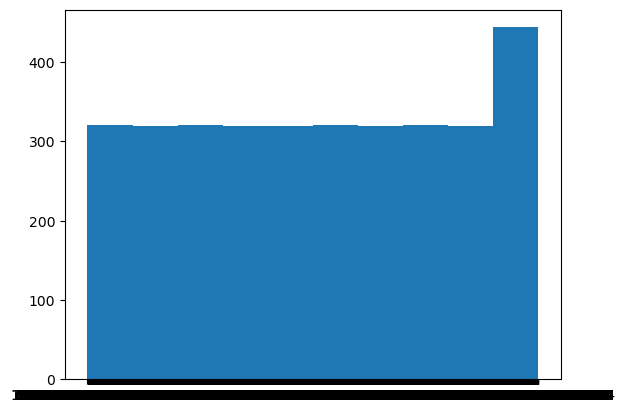

In [153]:
plt.hist(merged_df['profit_x'])

In [152]:
merged_df['profit_x']

0        1282.925890115338
1       1256.1567629152519
2       1091.0262884225012
3        879.1259045091451
4        763.3590180113001
               ...        
3323                     0
3324                     0
3325                     0
3326                     0
3327                     0
Name: profit_x, Length: 3328, dtype: object

# Первый запуск

In [2]:
from gmdh import time_series_transformation, split_data

In [3]:
response_ = pd.read_csv('C:/Users/ahrus/Downloads/3rd test/responce_in.csv', sep=';')

In [4]:
response_ = response_.applymap(lambda x: str(x).replace(',', '.'))

In [5]:
response_

,ticker1,ticker2,response
0,KMDUSDT,CTXCUSDT,434.7632689
1,ZECUSDT,BELUSDT,299.3886236
2,ZECUSDT,ONTUSDT,280.3593586
3,ZECUSDT,BLZUSDT,279.0456248
4,MTLUSDT,CTXCUSDT,277.008394
...,...,...,...
3323,MTLUSDT,IRISUSDT,-56.95174799
3324,LTCUSDT,OGUSDT,-59.4421813
3325,ZECUSDT,ICXUSDT,-72.74849531
3326,GBPUSDT,BNBDOWNUSDT,-140.2647747


In [37]:
matrix = merged_df.merge(response_, on=['ticker1', 'ticker2'], how='inner')

In [38]:
matrix.iloc[3163].response

'299.3886236'

In [39]:
reg_names = ['profit_x','max dd %_x','trades amount_x','avg_dur_winners_x','avg_dur_loosers_x','sortino_x','sharp_x','calmar_x','cagr_x','profit_factor_x','omega_x','ghpr_x','WL_x','T_value','response']

In [40]:
# print(matrix.columns)

In [41]:
regressors = matrix[reg_names]

In [42]:
regressors

,profit_x,max dd %_x,trades amount_x,avg_dur_winners_x,avg_dur_loosers_x,sortino_x,sharp_x,calmar_x,cagr_x,profit_factor_x,omega_x,ghpr_x,WL_x,T_value,response
0,1282.925890115338,-1.6281752227570552,906.0,2.28,3.7,34.86853908830639,0.3836419482579727,4.786279795676453,7.792902172503102,6.995365632756127,104.03011250479445,0.09115166198350177,5.04,-6.8,13.19425022
1,1256.1567629152519,-1.1044059239265822,932.0,2.37,3.74,29.392751091159926,0.43938446976972556,6.9515924453101245,7.677379877323776,6.789938589664879,72.89202399218065,0.08734099755776104,4.89873417721519,-4.05,10.55140699
2,1091.0262884225012,-0.3724144132315748,766.0,3.06,4.45,22.68483042546864,0.36143364396311645,18.62418546827634,6.935915103084156,8.437760822850045,52.581144578466805,0.09634599034138436,4.319444444444445,-3.51,0
3,879.1259045091451,-0.8374544235414086,2580.0,0.58,0.69,16.689636661155053,1.1663267585612977,7.047814992194406,5.902223841514664,3.789663308346955,56.353262692411164,0.02445286226040455,11.05607476635514,-4.99,0
4,763.3590180113001,-1.0549642948640323,984.0,1.92,3.3,18.152816015748503,1.2060968713037852,5.016108378153696,5.291815238120479,5.0306130476727615,61.20607961259202,0.05766097965649308,5.3076923076923075,-6.16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3323,0,0,0,0,0,0,0,0,0,0,0,0,0,-10.98,0
3324,0,0,0,0,0,0,0,0,0,0,0,0,0,-9.71,0
3325,0,0,0,0,0,0,0,0,0,0,0,0,0,-10.57,0
3326,0,0,0,0,0,0,0,0,0,0,0,0,0,-9.78,0


In [43]:
regressors = regressors.astype(float)

In [166]:
regressors['profit_x'].values

array([1282.92589012, 1256.15676292,  691.48758499, ...,   35.62276841,
         30.98020843,   30.42027963])

In [177]:
import numpy as np
import scipy.stats as stats

# Предположим, это ваши данные:
# Рассчитайте среднее и стандартное отклонение:
data = regressors['profit_x'].values
mean = np.mean(data)
std = np.std(data, ddof=1) # ddof=1 включает поправку Бесселя

# Рассчитайте стандартную ошибку:
stderr = std / np.sqrt(len(data))

# Получите критическое значение для 95% доверительного интервала:
confidence = 0.99
z = stats.t.ppf((1 + confidence) / 2., len(data)-1)

# Вычислите доверительный интервал:
start = mean - (z*stderr)
end = mean + (z*stderr)

print('Доверительный интервал: ({}, {})'.format(start, end))


Доверительный интервал: (253.87771855234345, 263.0610919441995)


In [184]:
regressors['profit_x'].median()

243.68514957618083

In [175]:
regressors['profit_x'].values.mean() - 2*regressors['profit_x'].values.std()

63.026148708754306

In [176]:
regressors['profit_x'].values.mean() + 2*regressors['profit_x'].values.std()

453.91266178778864

In [45]:
regressors.sort_values(by=['response'], ascending=False)

,profit_x,max dd %_x,trades amount_x,avg_dur_winners_x,avg_dur_loosers_x,sortino_x,sharp_x,calmar_x,cagr_x,profit_factor_x,omega_x,ghpr_x,WL_x,T_value,response
3164,86.007377,-17.291372,692.0,2.65,5.00,-0.058146,-0.046697,0.043542,0.752893,1.156217,0.880503,0.011907,3.589404,-4.06,434.763269
3163,86.288648,-7.069746,458.0,3.50,6.44,-0.110062,-0.094605,0.106831,0.755265,1.435902,0.749618,0.018073,3.770833,-3.91,299.388624
3177,76.079297,-1.886569,422.0,3.67,6.42,-0.426532,-0.391718,0.354511,0.668810,1.634356,0.330573,0.017377,4.410256,-4.10,280.359359
2928,145.246908,-11.964193,532.0,2.99,6.17,1.331133,0.456186,0.103688,1.240543,1.543325,3.131217,0.025448,4.731183,-3.77,279.045625
3174,76.584972,-17.290974,602.0,3.29,5.56,-0.043968,-0.037966,0.038928,0.673110,1.162447,0.883896,0.012239,4.153846,-4.20,277.008394
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,287.648689,-1.800652,724.0,2.64,4.43,2.911134,0.831679,1.291176,2.324959,2.863812,10.205814,0.034926,5.033333,-5.46,-56.951748
1342,264.292525,-14.711897,666.0,3.02,5.67,0.842052,0.349940,0.146468,2.154822,1.656679,2.744614,0.035113,4.859649,-3.69,-59.442181
3169,80.478368,-2.834211,482.0,2.99,6.10,-0.234356,-0.159111,0.249153,0.706153,1.481204,0.676682,0.016027,4.426966,-4.23,-72.748495
3198,42.937706,-3.666675,414.0,3.80,4.51,-0.438713,-0.384319,0.104434,0.382926,1.194520,0.408617,0.010131,1.785235,-4.66,-140.264775


In [46]:
regressors = regressors[regressors.response != 0]

In [47]:
regressors

,profit_x,max dd %_x,trades amount_x,avg_dur_winners_x,avg_dur_loosers_x,sortino_x,sharp_x,calmar_x,cagr_x,profit_factor_x,omega_x,ghpr_x,WL_x,T_value,response
0,1282.925890,-1.628175,906.0,2.28,3.70,34.868539,0.383642,4.786280,7.792902,6.995366,104.030113,0.091152,5.040000,-6.80,13.194250
1,1256.156763,-1.104406,932.0,2.37,3.74,29.392751,0.439384,6.951592,7.677380,6.789939,72.892024,0.087341,4.898734,-4.05,10.551407
5,691.487585,-4.980643,756.0,2.39,4.24,15.180265,0.397062,0.982656,4.894257,4.022517,32.062297,0.069549,5.517241,-6.11,9.673050
6,687.420531,-0.790584,1048.0,1.97,3.56,0.000000,1.282833,6.161649,4.871304,4.652799,0.000000,0.049936,6.705882,-10.38,48.268721
7,665.801372,-3.867434,792.0,2.39,4.11,3.625841,0.402452,1.227801,4.748440,3.545585,9.825765,0.064453,3.888889,-6.90,12.437410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,42.937706,-3.666675,414.0,3.80,4.51,-0.438713,-0.384319,0.104434,0.382926,1.194520,0.408617,0.010131,1.785235,-4.66,-140.264775
3199,38.169627,-2.219948,510.0,2.80,3.85,-0.578597,-0.648314,0.153661,0.341119,1.213163,0.160742,0.007345,2.035714,-4.66,61.214789
3200,35.622768,-2.729310,498.0,2.83,3.68,-0.558365,-0.552401,0.116775,0.318715,1.256297,0.293357,0.007029,1.929412,-4.66,-27.999008
3201,30.980208,-1.533321,498.0,3.14,2.97,-0.696692,-0.850374,0.181142,0.277749,1.269981,0.118006,0.006127,2.320000,-4.66,36.930794


In [48]:
regressors.response[(regressors.response <= 75) | (regressors.response >= 125)] = 0.0

In [49]:
regressors

,profit_x,max dd %_x,trades amount_x,avg_dur_winners_x,avg_dur_loosers_x,sortino_x,sharp_x,calmar_x,cagr_x,profit_factor_x,omega_x,ghpr_x,WL_x,T_value,response
0,1282.925890,-1.628175,906.0,2.28,3.70,34.868539,0.383642,4.786280,7.792902,6.995366,104.030113,0.091152,5.040000,-6.80,0.0
1,1256.156763,-1.104406,932.0,2.37,3.74,29.392751,0.439384,6.951592,7.677380,6.789939,72.892024,0.087341,4.898734,-4.05,0.0
5,691.487585,-4.980643,756.0,2.39,4.24,15.180265,0.397062,0.982656,4.894257,4.022517,32.062297,0.069549,5.517241,-6.11,0.0
6,687.420531,-0.790584,1048.0,1.97,3.56,0.000000,1.282833,6.161649,4.871304,4.652799,0.000000,0.049936,6.705882,-10.38,0.0
7,665.801372,-3.867434,792.0,2.39,4.11,3.625841,0.402452,1.227801,4.748440,3.545585,9.825765,0.064453,3.888889,-6.90,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,42.937706,-3.666675,414.0,3.80,4.51,-0.438713,-0.384319,0.104434,0.382926,1.194520,0.408617,0.010131,1.785235,-4.66,0.0
3199,38.169627,-2.219948,510.0,2.80,3.85,-0.578597,-0.648314,0.153661,0.341119,1.213163,0.160742,0.007345,2.035714,-4.66,0.0
3200,35.622768,-2.729310,498.0,2.83,3.68,-0.558365,-0.552401,0.116775,0.318715,1.256297,0.293357,0.007029,1.929412,-4.66,0.0
3201,30.980208,-1.533321,498.0,3.14,2.97,-0.696692,-0.850374,0.181142,0.277749,1.269981,0.118006,0.006127,2.320000,-4.66,0.0


In [50]:
regressors.response[(regressors.response > 75) & (regressors.response < 125)] = 1.0

In [51]:
regressors.response.mean()

0.2541528239202658

In [52]:
regressors.iloc[2141]

profit_x             201.207969
max dd %_x            -1.654637
trades amount_x      696.000000
avg_dur_winners_x      2.610000
avg_dur_loosers_x      4.760000
sortino_x              1.142936
sharp_x                0.326195
calmar_x               1.015680
cagr_x                 1.680581
profit_factor_x        2.141834
omega_x                3.102853
ghpr_x                 0.026344
WL_x                   4.898305
T_value               -4.320000
response               0.000000
Name: 2289, dtype: float64

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
X = regressors[['profit_x','max dd %_x','trades amount_x','avg_dur_winners_x','avg_dur_loosers_x','sortino_x','sharp_x','calmar_x','cagr_x','profit_factor_x','omega_x','ghpr_x','WL_x','T_value']]

In [55]:
y = regressors['response']

In [56]:
y.astype(int)

0       0
1       0
5       0
6       0
7       0
       ..
3198    0
3199    0
3200    0
3201    0
3202    0
Name: response, Length: 3010, dtype: int32

In [57]:
# Создание объекта StandardScaler
scaler = StandardScaler()

# Масштабирование данных
scaled_data = scaler.fit_transform(X)

# Создание нового датафрейма с масштабированными данными
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

In [58]:
X_scaled

,profit_x,max dd %_x,trades amount_x,avg_dur_winners_x,avg_dur_loosers_x,sortino_x,sharp_x,calmar_x,cagr_x,profit_factor_x,omega_x,ghpr_x,WL_x,T_value
0,10.483416,0.322873,1.817440,-1.872110,-1.647897,0.124592,-0.725520,3.657874,8.172710,8.188039,0.116736,7.212261,0.214809,-1.260773
1,10.209484,0.521235,2.047711,-1.649453,-1.586017,0.096758,-0.571853,5.970464,8.007204,7.819836,0.066675,6.747043,0.100132,0.545903
2,4.431140,-0.946775,0.488958,-1.599973,-0.812526,0.024512,-0.688526,-0.404462,4.019889,2.859569,0.001033,4.574950,0.602224,-0.807462
3,4.389521,0.640085,3.075070,-2.639043,-1.864474,-0.052653,1.753312,5.126792,3.987004,3.989273,-0.050513,2.180549,1.567141,-3.612737
4,4.168289,-0.525180,0.807794,-1.599973,-1.013634,-0.034222,-0.673667,-0.142642,3.810981,2.004725,-0.034716,3.952849,-0.719641,-1.326470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3005,-2.205568,-0.449149,-2.539982,1.888335,-0.394840,-0.054883,-2.842587,-1.342417,-2.443389,-2.209273,-0.049856,-2.679003,-2.427347,0.145150
3006,-2.254360,0.098756,-1.689753,-0.585642,-1.415849,-0.055594,-3.570351,-1.289842,-2.503286,-2.175857,-0.050255,-3.019099,-2.224013,0.145150
3007,-2.280423,-0.094149,-1.796032,-0.511423,-1.678836,-0.055491,-3.305943,-1.329237,-2.535382,-2.098545,-0.050041,-3.057709,-2.310307,0.145150
3008,-2.327931,0.358796,-1.796032,0.255510,-2.777194,-0.056194,-4.127375,-1.260492,-2.594075,-2.074019,-0.050323,-3.167859,-1.993235,0.145150


In [59]:
from sklearn.model_selection import train_test_split


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [61]:
# from gmdh import SequentialCriterion, Solver
# from gmdh import Criterion, CriterionType


# seq_criterion = SequentialCriterion(criterion_type=CriterionType.SYM_REGULARITY, 
#                                     second_criterion_type=CriterionType.SYM_STABILITY, 
#                                     solver=Solver.FAST)

In [62]:
# from gmdh import Ria

# model = Ria()

In [63]:
# model.fit(X_train.values, y_train.values)

In [64]:
# print(model.get_best_polynomial())

In [65]:
# import matplotlib.pyplot as plt
# plt.figure(figsize=(20, 8))  
# plt.plot(y_train)
# plt.plot(model.predict(X_train))

In [66]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [141]:
# Преобразование данных в DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Задайте параметры для xgboost
params = {
    'max_depth': 1000,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Обучение модели
num_rounds = 11
model = xgb.train(params, dtrain, num_rounds)

In [142]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Предсказание на тестовом наборе
preds_prob = model.predict(dtest)

# Предсказания в виде вероятностей, поэтому преобразуем их в бинарные предсказания
preds = [1 if x > 0.5 else 0 for x in preds_prob]

# Оценка модели

accuracy = accuracy_score(y_test, preds)
precision = precision_score(y_test, preds)
recall = recall_score(y_test, preds)
f1 = f1_score(y_test, preds)
confusion_mat = confusion_matrix(y_test, preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(confusion_mat)

#75% угадано правильно

Accuracy: 0.7259136212624585
Precision: 0.42857142857142855
Recall: 0.13291139240506328
F1-score: 0.20289855072463767
Confusion Matrix:
[[416  28]
 [137  21]]


In [143]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Предсказание на тестовом наборе
preds_prob = model.predict(dtrain)

# Предсказания в виде вероятностей, поэтому преобразуем их в бинарные предсказания
preds = [1 if x > 0.5 else 0 for x in preds_prob]

# Оценка модели

accuracy = accuracy_score(y_train, preds)
precision = precision_score(y_train, preds)
recall = recall_score(y_train, preds)
f1 = f1_score(y_train, preds)
confusion_mat = confusion_matrix(y_train, preds)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(confusion_mat)

#75% угадано правильно

Accuracy: 0.9983388704318937
Precision: 1.0
Recall: 0.9934102141680395
F1-score: 0.996694214876033
Confusion Matrix:
[[1801    0]
 [   4  603]]


In [144]:
y_test

3085    1.0
649     0.0
3052    0.0
67      0.0
1493    1.0
       ... 
1006    0.0
117     0.0
1458    0.0
2747    0.0
1863    0.0
Name: response, Length: 602, dtype: float64

In [145]:
kk=0
for i in y_test:
    if i==1:
        kk+=1
kk

158

In [146]:
#25% принадлежат классу 1, 75% - классу 0. То есть если предсказатель будет предсказывать всегда класс 0, то точность будет 75%
y_train.mean()

0.2520764119601329

In [147]:
preds_prob_tr = model.predict(dtrain)

preds_tr = [1 if x > 0.5 else 0 for x in preds_prob_tr]

# Оценка модели
accuracy_tr = accuracy_score(y_train, preds_tr)
print(f"Accuracy: {accuracy_tr}")

Accuracy: 0.9983388704318937


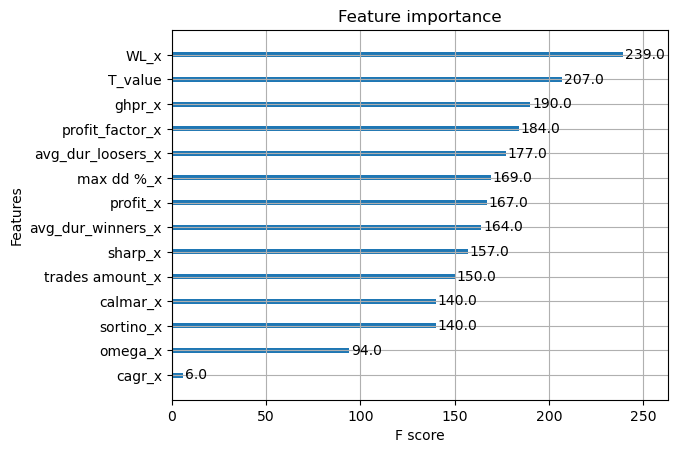

In [148]:
# Вывод важности признаков
xgb.plot_importance(model)
plt.show()

1) добавить учёт фундаментала 
2) профит заменить на профит за единицу времени
3) количество сделок заменить на количество сделок за единицу времени 
4) Проблема: в изначальных данных соотношение класса 1 к классу 2 -  25%/75% 

"Если в ваших данных 75% примеров принадлежат к классу 1, то если ваша модель имеет точность 0.75, это говорит о том, что она не лучше случайного угадывания"

5) Вполне возможно, что между целевой переменной и регрессорами (или признаками) может не существовать статистически значимой связи. Это может происходить в том случае, если выбранные признаки не имеют прямого или косвенного влияния на целевую переменную.
В таких ситуациях модель машинного обучения может не суметь извлечь полезные закономерности из данных и, следовательно, будет выдавать ненадежные или случайные предсказания. Это может быть одной из причин низкой точности или других метрик качества модели.

6) думал по поводу выбросов, нужно ли их очищать, но chatgpt говорит, что деревья решений, используемые в xgboost, устойчивы к выброса. Плюс это не выбросы или аномалии, это реальные результаты, которые получились на бэктесте

Дальнейший план:
1) заменить профит и количество сделок на эквиваленты, обучить модель 
2) добавить учёт фундаментала в качестве категориального признака, обучить модель
3) попробовать оставить в обучающей выборке соотношение класса 1 к классу 2 50/50


4) провести ещё бэк+форвард тесты с параметрами 2/1 (500-1000 штук) на новых парах, чтобы было больше данных для обучения и проверки моделей 

Если результаты будут плохие, то

5) провести бэктесты+форвард  3500 пар с параметрами 30/7 и попробовать искать зависимости там 

# Второй запуск: учёт 2,3

In [193]:
X

,profit_x,max dd %_x,trades amount_x,avg_dur_winners_x,avg_dur_loosers_x,sortino_x,sharp_x,calmar_x,cagr_x,profit_factor_x,omega_x,ghpr_x,WL_x,T_value
0,1282.925890,-1.628175,906.0,2.28,3.70,34.868539,0.383642,4.786280,7.792902,6.995366,104.030113,0.091152,5.040000,-6.80
1,1256.156763,-1.104406,932.0,2.37,3.74,29.392751,0.439384,6.951592,7.677380,6.789939,72.892024,0.087341,4.898734,-4.05
5,691.487585,-4.980643,756.0,2.39,4.24,15.180265,0.397062,0.982656,4.894257,4.022517,32.062297,0.069549,5.517241,-6.11
6,687.420531,-0.790584,1048.0,1.97,3.56,0.000000,1.282833,6.161649,4.871304,4.652799,0.000000,0.049936,6.705882,-10.38
7,665.801372,-3.867434,792.0,2.39,4.11,3.625841,0.402452,1.227801,4.748440,3.545585,9.825765,0.064453,3.888889,-6.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,42.937706,-3.666675,414.0,3.80,4.51,-0.438713,-0.384319,0.104434,0.382926,1.194520,0.408617,0.010131,1.785235,-4.66
3199,38.169627,-2.219948,510.0,2.80,3.85,-0.578597,-0.648314,0.153661,0.341119,1.213163,0.160742,0.007345,2.035714,-4.66
3200,35.622768,-2.729310,498.0,2.83,3.68,-0.558365,-0.552401,0.116775,0.318715,1.256297,0.293357,0.007029,1.929412,-4.66
3201,30.980208,-1.533321,498.0,3.14,2.97,-0.696692,-0.850374,0.181142,0.277749,1.269981,0.118006,0.006127,2.320000,-4.66


In [194]:
X['profit_x'] = X['profit_x'] / 7296.0
X['trades amount_x'] = X['trades amount_x'] / 7296.0

C:\Users\ahrus\AppData\Local\Temp\ipykernel_28732\2780545116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['profit_x'] = X['profit_x'] / 7296.0
C:\Users\ahrus\AppData\Local\Temp\ipykernel_28732\2780545116.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['trades amount_x'] = X['trades amount_x'] / 7296.0


In [195]:
X

,profit_x,max dd %_x,trades amount_x,avg_dur_winners_x,avg_dur_loosers_x,sortino_x,sharp_x,calmar_x,cagr_x,profit_factor_x,omega_x,ghpr_x,WL_x,T_value
0,0.175840,-1.628175,0.124178,2.28,3.70,34.868539,0.383642,4.786280,7.792902,6.995366,104.030113,0.091152,5.040000,-6.80
1,0.172171,-1.104406,0.127741,2.37,3.74,29.392751,0.439384,6.951592,7.677380,6.789939,72.892024,0.087341,4.898734,-4.05
5,0.094776,-4.980643,0.103618,2.39,4.24,15.180265,0.397062,0.982656,4.894257,4.022517,32.062297,0.069549,5.517241,-6.11
6,0.094219,-0.790584,0.143640,1.97,3.56,0.000000,1.282833,6.161649,4.871304,4.652799,0.000000,0.049936,6.705882,-10.38
7,0.091256,-3.867434,0.108553,2.39,4.11,3.625841,0.402452,1.227801,4.748440,3.545585,9.825765,0.064453,3.888889,-6.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3198,0.005885,-3.666675,0.056743,3.80,4.51,-0.438713,-0.384319,0.104434,0.382926,1.194520,0.408617,0.010131,1.785235,-4.66
3199,0.005232,-2.219948,0.069901,2.80,3.85,-0.578597,-0.648314,0.153661,0.341119,1.213163,0.160742,0.007345,2.035714,-4.66
3200,0.004883,-2.729310,0.068257,2.83,3.68,-0.558365,-0.552401,0.116775,0.318715,1.256297,0.293357,0.007029,1.929412,-4.66
3201,0.004246,-1.533321,0.068257,3.14,2.97,-0.696692,-0.850374,0.181142,0.277749,1.269981,0.118006,0.006127,2.320000,-4.66


In [196]:
y = regressors['response']

In [197]:
# Создание объекта StandardScaler
scaler = StandardScaler()

# Масштабирование данных
scaled_data = scaler.fit_transform(X)

# Создание нового датафрейма с масштабированными данными
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

In [199]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [201]:
# Преобразование данных в DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Задайте параметры для xgboost
params = {
    'max_depth': 5,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'logloss'
}

# Обучение модели
num_rounds = 20
model = xgb.train(params, dtrain, num_rounds)

In [202]:
# Предсказание на тестовом наборе
preds_prob = model.predict(dtest)

# Предсказания в виде вероятностей, поэтому преобразуем их в бинарные предсказания
preds = [1 if x > 0.5 else 0 for x in preds_prob]

# Оценка модели
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy}")

#75% угадано правильно

Accuracy: 0.7408637873754153


In [203]:
#25% принадлежат классу 1, 75% - классу 0. То есть если предсказатель будет предсказывать всегда класс 0, то точность будет 75%
y_train.mean()

0.2520764119601329

При учёте времени торговли получается такой же результат (что логично, т.к. все значения изменяются пропорционально), но в такой постановке модель можно использовать для тестов за другой период делением профита и количества сделок на время работы стратегии

# Больше эпох и глубже деревья

In [205]:
# Преобразование данных в DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Задайте параметры для xgboost
params = {
    'max_depth': 5,
    'eta': 0.3,
    'objective': 'binary:logistic',
    'eval_metric': 'auc'
}

# Обучение модели
num_rounds = 20
model = xgb.train(params, dtrain, num_rounds)

In [206]:
# Предсказание на тестовом наборе
preds_prob = model.predict(dtest)

# Предсказания в виде вероятностей, поэтому преобразуем их в бинарные предсказания
preds = [1 if x > 0.5 else 0 for x in preds_prob]

# Оценка модели
accuracy = accuracy_score(y_test, preds)
print(f"Accuracy: {accuracy}")

#75% угадано правильно

Accuracy: 0.7408637873754153


# Выбор лучших параметров

In [212]:
#ручной перебор

In [213]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Инициализация параметров, которые хотите проверить
param_grid = {
    'booster': ['gbtree', 'gblinear', 'dart'],
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7, 10, 15, 20, 25, 50, 100],
    'gamma': [0, 0.1, 0.2, 0.4, 0.5],
    'subsample': [0.5, 0.8, 1],
    'n_estimators': [50, 100, 200, 300, 400, 500]

}

# Инициализация модели
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric="logloss")

# Инициализация GridSearchCV
grid_search = GridSearchCV(xgb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Обучение модели
grid_search.fit(X_train, y_train)

# Вывод лучших параметров
print(grid_search.best_params_)


C:\Users\ahrus\anaconda3\envs\pair_arb1\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\ahrus\anaconda3\envs\pair_arb1\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


{'booster': 'gbtree', 'gamma': 0.5, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1}


In [214]:
import xgboost as xgb

# Инициализация модели с указанными параметрами
model = xgb.XGBClassifier(booster='gbtree', gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1, use_label_encoder=False, eval_metric="logloss")

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Прогнозирование классов на тестовых данных
y_pred = model.predict(X_test)


Accuracy: 0.7358803986710963
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
[[443   1]
 [158   0]]


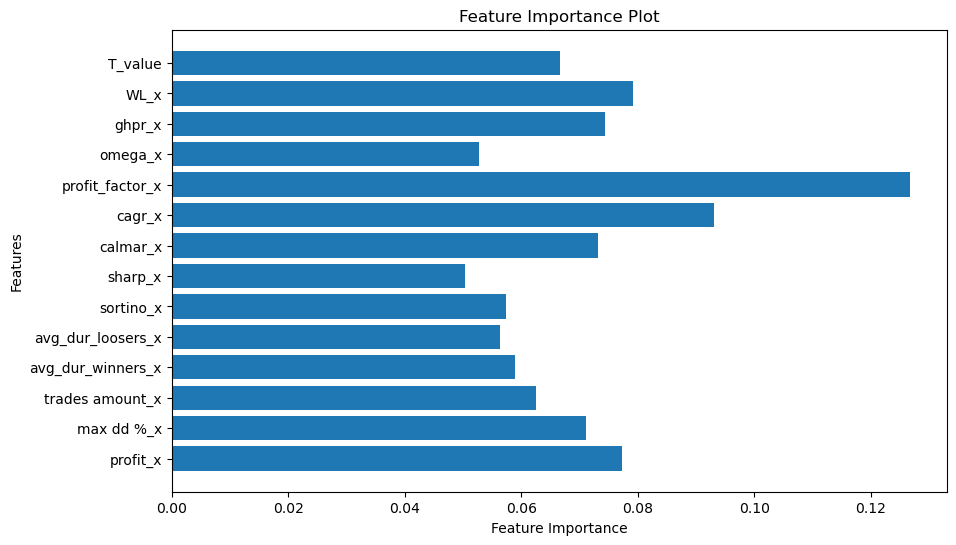

In [215]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Сравнение предсказанных классов с истинными классами
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

# Получение важности признаков
importance = model.feature_importances_
feature_names = X_train.columns

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


байесовский перебор

In [217]:
from hyperopt import hp, fmin, tpe, Trials

# Определение пространства поиска
space = {
    'booster': hp.choice('booster', ['dart']),
    'learning_rate': hp.choice('learning_rate', [0.01, 0.1, 0.5]),
    'max_depth': hp.choice('max_depth', [3, 5, 7, 10, 15, 20, 25, 50, 100]),
    'gamma': hp.choice('gamma', [0, 0.1, 0.2, 0.4, 0.5]),
    'subsample': hp.choice('subsample', [0.5, 0.8, 1]),
    'n_estimators': hp.choice('n_estimators', [50, 100, 200, 300, 400, 500])
}

# Определение целевой функции
def objective(params):
    model = xgb.XGBClassifier(**params, eval_metric="logloss")
    score = np.mean(cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy'))
    return {'loss': -score, 'status': STATUS_OK}

# Запуск оптимизации
trials = Trials()
best_params = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

print(best_params)


100%|██████████| 100/100 [17:56<00:00, 10.77s/trial, best loss: -0.7479236735889625]
{'booster': 0, 'gamma': 1, 'learning_rate': 0, 'max_depth': 0, 'n_estimators': 2, 'subsample': 1}


In [218]:
import xgboost as xgb

# Инициализация модели с указанными параметрами
model = xgb.XGBClassifier(booster='dart', gamma=0.1, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8, use_label_encoder=False, eval_metric="logloss")

# Обучение модели на тренировочных данных
model.fit(X_train, y_train)

# Прогнозирование классов на тестовых данных
y_pred = model.predict(X_test)


C:\Users\ahrus\anaconda3\envs\pair_arb1\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


C:\Users\ahrus\anaconda3\envs\pair_arb1\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.7375415282392026
Precision: 0.0
Recall: 0.0
F1-score: 0.0
Confusion Matrix:
[[444   0]
 [158   0]]


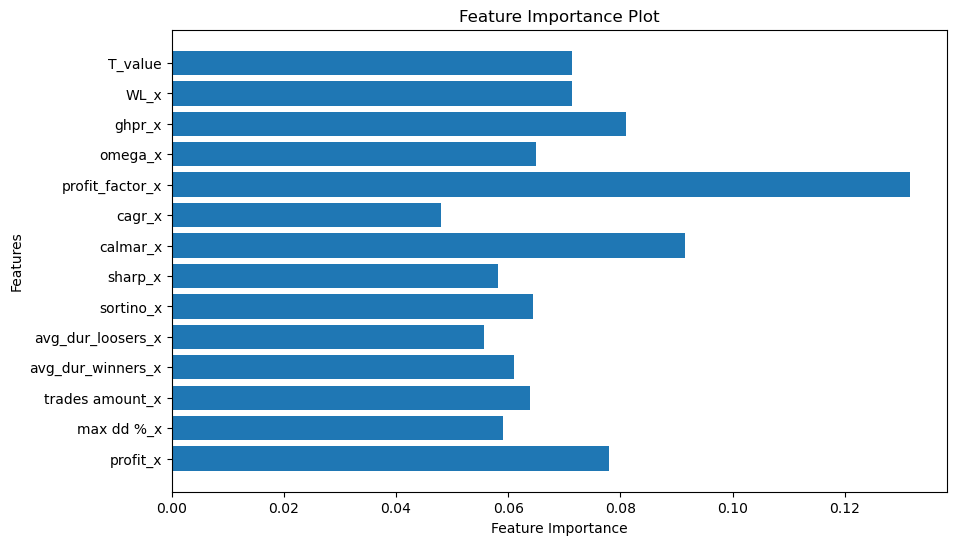

In [219]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

# Сравнение предсказанных классов с истинными классами
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

# Получение важности признаков
importance = model.feature_importances_
feature_names = X_train.columns

# Визуализация важности признаков
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance Plot")
plt.show()


Итог: попробовать поработать с обучающими данными (соотношени 1 и 0 классов 50 на 50) 

попробовать нейронку

добавить учёт фундаментала 

# Нейросеть

In [244]:
X_train.shape[1]

14

In [250]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Инициализация модели нейронной сети
model = Sequential()
model.add(Dense(15, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(30, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(120, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=300, batch_size=16)

# Прогнозирование вероятностей классов на тестовых данных
y_pred_prob = model.predict(X_test)
# Преобразование вероятностей в бинарные классы
y_pred = (y_pred_prob > 0.5).astype(int)

Epoch 1/300
151/151 [==============================] - 1s 2ms/step - loss: 0.5706 - accuracy: 0.7479
Epoch 2/300
151/151 [==============================] - 0s 2ms/step - loss: 0.5551 - accuracy: 0.7479
Epoch 3/300
151/151 [==============================] - 0s 2ms/step - loss: 0.5499 - accuracy: 0.7479
Epoch 4/300
151/151 [==============================] - 0s 2ms/step - loss: 0.5521 - accuracy: 0.7479
Epoch 5/300
151/151 [==============================] - 0s 2ms/step - loss: 0.5460 - accuracy: 0.7479
Epoch 6/300
151/151 [==============================] - 0s 2ms/step - loss: 0.5441 - accuracy: 0.7479
Epoch 7/300
151/151 [==============================] - 0s 2ms/step - loss: 0.5414 - accuracy: 0.7479
Epoch 8/300
151/151 [==============================] - 0s 2ms/step - loss: 0.5400 - accuracy: 0.7479
Epoch 9/300
151/151 [==============================] - 0s 2ms/step - loss: 0.5381 - accuracy: 0.7479
Epoch 10/300
151/151 [==============================] - 0s 2ms/step - loss: 0.5383 - accura

In [251]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Сравнение предсказанных классов с истинными классами
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.6677740863787376
Precision: 0.3409090909090909
Recall: 0.2848101265822785
F1-score: 0.3103448275862069
Confusion Matrix:
[[357  87]
 [113  45]]


In [255]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Инициализация модели нейронной сети
model = Sequential()
model.add(Dense(14, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(7, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Компиляция модели
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Обучение модели
history = model.fit(X_train, y_train, epochs=1000, batch_size=16)

# Прогнозирование вероятностей классов на тестовых данных
y_pred_prob = model.predict(X_test)
# Преобразование вероятностей в бинарные классы
y_pred = (y_pred_prob > 0.5).astype(int)

Epoch 1/1000
151/151 [==============================] - 1s 1ms/step - loss: 0.6042 - accuracy: 0.7479
Epoch 2/1000
151/151 [==============================] - 0s 1ms/step - loss: 0.5553 - accuracy: 0.7479
Epoch 3/1000
151/151 [==============================] - 0s 1ms/step - loss: 0.5514 - accuracy: 0.7479
Epoch 4/1000
151/151 [==============================] - 0s 1ms/step - loss: 0.5494 - accuracy: 0.7479
Epoch 5/1000
151/151 [==============================] - 0s 2ms/step - loss: 0.5482 - accuracy: 0.7479
Epoch 6/1000
151/151 [==============================] - 0s 1ms/step - loss: 0.5464 - accuracy: 0.7479
Epoch 7/1000
151/151 [==============================] - 0s 2ms/step - loss: 0.5465 - accuracy: 0.7479
Epoch 8/1000
151/151 [==============================] - 0s 1ms/step - loss: 0.5447 - accuracy: 0.7479
Epoch 9/1000
151/151 [==============================] - 0s 1ms/step - loss: 0.5442 - accuracy: 0.7479
Epoch 10/1000
151/151 [==============================] - 0s 1ms/step - loss: 0.543

In [256]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Сравнение предсказанных классов с истинными классами
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

Accuracy: 0.6910299003322259
Precision: 0.3409090909090909
Recall: 0.189873417721519
F1-score: 0.24390243902439024
Confusion Matrix:
[[386  58]
 [128  30]]


# Плюс наличие фундаментала как признак

# Обработка фундаментала

In [146]:
temp_thing = pd.read_csv('C:/Users/ahrus/Downloads/4th_test_pairs.csv', sep=';')

In [147]:
temp_thing

,ticker1,ticker2,test1,test2,test3,t_val
0,ETHDOWN,RIF,False,False,True,"-0,69"
1,STX,ADADOWN,False,False,True,"-0,89"
2,NEO,ADADOWN,False,False,True,-1
3,ADADOWN,RIF,False,False,True,"-1,02"
4,STX,BTCDOWN,False,False,True,"-1,036"
...,...,...,...,...,...,...
1392,MTL,WAVES,False,False,True,"-3,42"
1393,BTC,FIO,False,False,True,"-3,4218"
1394,BTC,RLC,False,False,True,"-3,4234"
1395,RLC,BTCUP,False,False,True,"-3,4237"


In [148]:
temp_thing['ticker1'] += 'USDT'
temp_thing['ticker2'] += 'USDT'

In [149]:
temp_thing

,ticker1,ticker2,test1,test2,test3,t_val
0,ETHDOWNUSDT,RIFUSDT,False,False,True,"-0,69"
1,STXUSDT,ADADOWNUSDT,False,False,True,"-0,89"
2,NEOUSDT,ADADOWNUSDT,False,False,True,-1
3,ADADOWNUSDT,RIFUSDT,False,False,True,"-1,02"
4,STXUSDT,BTCDOWNUSDT,False,False,True,"-1,036"
...,...,...,...,...,...,...
1392,MTLUSDT,WAVESUSDT,False,False,True,"-3,42"
1393,BTCUSDT,FIOUSDT,False,False,True,"-3,4218"
1394,BTCUSDT,RLCUSDT,False,False,True,"-3,4234"
1395,RLCUSDT,BTCUPUSDT,False,False,True,"-3,4237"


In [ ]:
temp_thing = pd.read_csv('C:/Users/ahrus/Downloads/4th_test_pairs.csv', sep=';')

In [153]:
temp_thing.to_csv('C:/Users/ahrus/Downloads/4th_test_pairs.csv', index=False, sep=';')
